In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
import logging
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import display

redonebooks = pd.read_csv('books.csv')
logging.basicConfig(filename='recommendation_system.log', level=logging.INFO)
logging.info('Recommendation system started...')

In [202]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display
item_data = redonebooks[['title', 'average_rating', 'num_pages', 'ratings_count']].set_index('title')

item_data_filled = item_data.fillna(0)
normalized_item_data = (item_data_filled - item_data_filled.mean()) / (item_data_filled.max() - item_data_filled.min())
item_similarity = cosine_similarity(normalized_item_data)
item_similarity_df = pd.DataFrame(item_similarity, index=item_data.index, columns=item_data.index)

def get_top_n_recommendations(item_similarity_df, item_title, n=5):
    similar_items = item_similarity_df[item_title].sort_values(ascending=False)[1:n+1]
    return similar_items.index.tolist()

item_title_dropdown = widgets.Dropdown(options=item_data.index, description='Select a Book:')

recommendations_output = widgets.Output()

def update_recommendations(change):
    item_title = change.new
    with recommendations_output:
        recommendations_output.clear_output()
        top_recommendations = get_top_n_recommendations(item_similarity_df, item_title, n=5)
        print(f'Top 5 recommendations for "{item_title}":\n{top_recommendations}')

item_title_dropdown.observe(update_recommendations, names='value')

display(item_title_dropdown)
display(recommendations_output)


Dropdown(description='Select a Book:', options=('Rage of angels', 'Warhost of Vastmark', 'Taken at the Flood',…

Output()

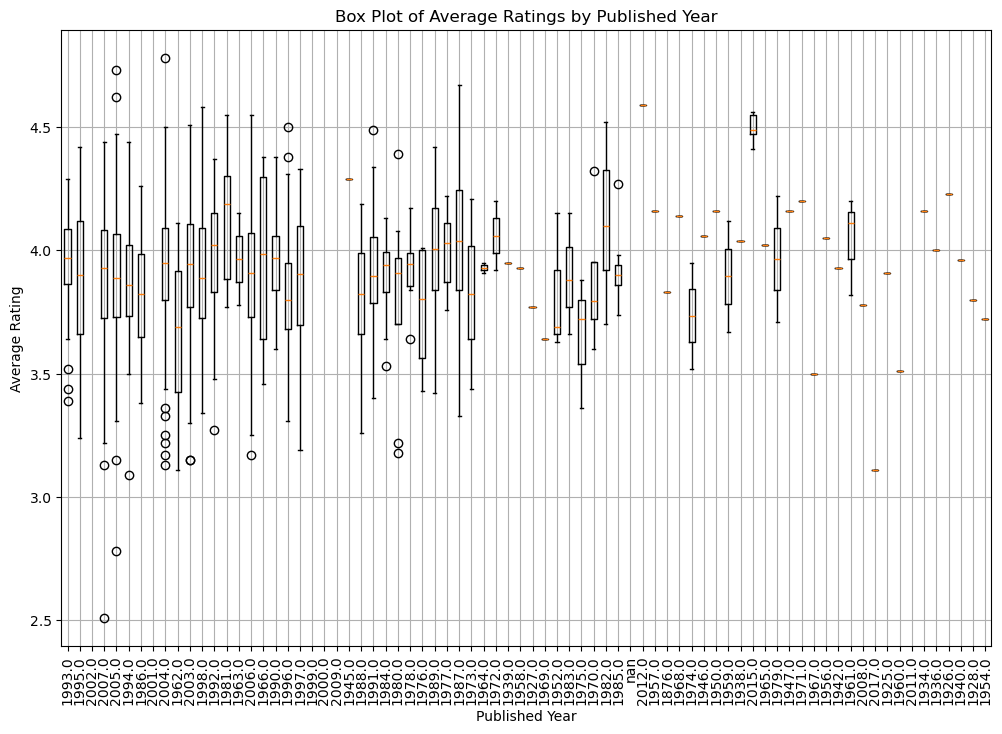

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.boxplot([redonebooks[redonebooks['published_year'] == year]['average_rating'] for year in redonebooks['published_year'].unique()], labels=redonebooks['published_year'].unique(), vert=True)
plt.title('Box Plot of Average Ratings by Published Year')
plt.xlabel('Published Year')
plt.ylabel('Average Rating')
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

In [199]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
category_dropdown = widgets.Dropdown(options=['All'] + redonebooks['categories'].unique().tolist(), value='All', description='Category:')
output = widgets.Output()
def update_histogram(change):
    selected_category = change.new
    with output:
        output.clear_output()
        if selected_category == 'All':
            plt.figure(figsize=(10, 6))
            plt.hist(redonebooks['average_rating'], bins=10, color='skyblue', edgecolor='black')
            plt.title('Distribution of Average Ratings')
            plt.xlabel('Average Rating')
            plt.ylabel('Frequency')
            plt.show()
        else:
            category_data = redonebooks[redonebooks['categories'] == selected_category]
            plt.figure(figsize=(10, 6))
            plt.hist(category_data['average_rating'], bins=10, color='skyblue', edgecolor='black')
            plt.title(f'Distribution of Average Ratings for Category: {selected_category}')
            plt.xlabel('Average Rating')
            plt.ylabel('Frequency')
            plt.show()
category_dropdown.observe(update_histogram, names='value')
display(category_dropdown)
display(output)


Dropdown(description='Category:', options=('All', 'Fiction', 'Juvenile Fiction', 'Drama', 'History'), value='A…

Output()

In [201]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
output = widgets.Output()
def update_scatter_plot(_):
    with output:
        output.clear_output()
        plt.figure(figsize=(10, 6))
        plt.scatter(redonebooks['num_pages'], redonebooks['average_rating'], color='blue', alpha=0.6)
        plt.title('Scatter Plot of Number of Pages vs Average Rating')
        plt.xlabel('Number of Pages')
        plt.ylabel('Average Rating')
        plt.grid(True)
        plt.show()
button = widgets.Button(description="Generate Scatter Plot")
button.on_click(update_scatter_plot)
display(button)
display(output)


Button(description='Generate Scatter Plot', style=ButtonStyle())

Output()